In [5]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np

In [6]:
us_data=pd.read_csv('datasets\\US Sales.csv') 

In [7]:
us_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [8]:
df1=us_data.copy()      

In [9]:
df1.shape
print("rows:",df1.shape[0])
print("columns:",df1.shape[1])

rows: 185950
columns: 11


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [11]:
df1.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [12]:
df1=df1.drop(columns=['Unnamed: 0'])
df1.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [13]:
df1['Order Date']=pd.to_datetime(df1['Order Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


In [14]:
df1.duplicated().sum()

264

In [15]:
s=df1['Order ID']
len(s)

185950

In [16]:
df1.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   53
City                     9
Hour                    24
dtype: int64

In [17]:
r1=df1.duplicated(subset='Order ID')
r1.value_counts()

False    178437
True       7513
Name: count, dtype: int64

In [18]:
duplicates=df1[df1.duplicated(subset=['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address','Month','Sales','City','Hour'])]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
438,296081,Flatscreen TV,1,300.00,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301",12,300.00,Austin,16
1727,297311,Bose SoundSport Headphones,1,99.99,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001",12,99.99,Los Angeles,7
2812,298358,Apple Airpods Headphones,1,150.00,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016",12,150.00,San Francisco,15
3119,298657,Lightning Charging Cable,1,14.95,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301",12,14.95,Atlanta,18
3363,298883,Wired Headphones,1,11.99,2019-12-28 18:07:00,"516 Willow St, Los Angeles, CA 90001",12,11.99,Los Angeles,18
...,...,...,...,...,...,...,...,...,...,...
181613,218756,AAA Batteries (4-pack),1,2.99,2019-06-11 14:54:00,"362 Hickory St, Boston, MA 02215",6,2.99,Boston,14
181883,219007,AA Batteries (4-pack),1,3.84,2019-06-24 11:16:00,"42 8th St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
183323,220392,Lightning Charging Cable,1,14.95,2019-06-08 17:13:00,"472 8th St, Portland, ME 04101",6,14.95,Portland,17
183826,220882,Lightning Charging Cable,1,14.95,2019-06-13 17:53:00,"588 Lake St, Boston, MA 02215",6,14.95,Boston,17


In [19]:
df1=df1.drop_duplicates(subset=['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address','Month','Sales','City','Hour'])
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [20]:
us_data.shape

(185950, 11)

In [21]:
df1.shape

(185686, 10)

In [22]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [23]:
products_count=df1.groupby('Product').size().reset_index(name='Count')
products_count=products_count.sort_values('Count',ascending=False)
products_count

,Product,Count
15,USB-C Charging Cable,21859
12,Lightning Charging Cable,21610
5,AAA Batteries (4-pack),20612
4,AA Batteries (4-pack),20558
17,Wired Headphones,18849
6,Apple Airpods Headphones,15525
7,Bose SoundSport Headphones,13298
2,27in FHD Monitor,7498
18,iPhone,6840
1,27in 4K Gaming Monitor,6225


In [24]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [25]:
Order_quality=df1.groupby('Quantity Ordered').size().reset_index(name='Count')
Order_quality=Order_quality.sort_values('Count',ascending=False)
Order_quality

,Quantity Ordered,Count
0,1,168291
1,2,13321
2,3,2920
3,4,806
4,5,236
5,6,80
6,7,24
7,8,5
8,9,3


In [26]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [27]:
price_each=df1.groupby('Price Each').size().reset_index(name='Count')
price_each=price_each.sort_values('Count',ascending=False)
price_each

,Price Each,Count
2,11.95,21859
4,14.95,21610
0,2.99,20612
1,3.84,20558
3,11.99,18849
8,150.00,15525
5,99.99,13298
7,149.99,7498
14,700.00,6840
13,600.00,6834


In [28]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [29]:
top15_addr=df1.groupby('Purchase Address').size().reset_index(name='Count')
top15_addr=top15_addr.sort_values('Count',ascending=False)
top15_addr.head(15)

,Purchase Address,Count
14759,"193 Forest St, San Francisco, CA 94016",9
28206,"279 Sunset St, San Francisco, CA 94016",8
19593,"223 Elm St, Los Angeles, CA 90001",8
98161,"727 9th St, San Francisco, CA 94016",7
12071,"176 North St, San Francisco, CA 94016",7
84883,"640 West St, San Francisco, CA 94016",7
30242,"292 Washington St, San Francisco, CA 94016",7
88145,"662 Chestnut St, San Francisco, CA 94016",7
96489,"716 5th St, San Francisco, CA 94016",7
29033,"284 Walnut St, San Francisco, CA 94016",7


In [30]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [31]:
month_sales=df1.groupby('Month').size().reset_index(name='Count')
month_sales=month_sales.sort_values('Count',ascending=False)
month_sales

,Month,Count
11,12,24944
9,10,20249
3,4,18257
10,11,17544
4,5,16552
2,3,15128
6,7,14275
5,6,13535
1,2,11957
7,8,11943


In [32]:
top10salesprice=df1.groupby('Sales').size().reset_index(name='Count')
top10salesprice=top10salesprice.sort_values('Count',ascending=False)
top10salesprice.head(10)

,Sales,Count
9,14.95,20328
6,11.95,19975
8,11.99,17328
32,150.00,15414
1,3.84,15315
0,2.99,13699
29,99.99,13168
31,149.99,7455
42,600.00,6846
43,700.00,6833


In [33]:
df1['City'].value_counts()

City
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

In [34]:
hourlysale_count=df1.groupby('Hour').size().reset_index(name='Count')
hourlysale_count=hourlysale_count.sort_values('Count',ascending=False)
hourlysale_count

,Hour,Count
19,19,12886
12,12,12573
11,11,12392
18,18,12263
20,20,12218
13,13,12115
14,14,10965
10,10,10929
21,21,10905
17,17,10884


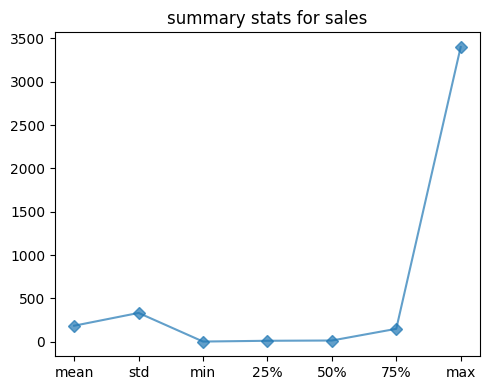

In [35]:
plt.figure(figsize=(5,4))
df1['Sales'].describe()[1:].plot(alpha=0.7,marker='D', markersize=6)
plt.title('summary stats for sales')
plt.tight_layout()
plt.show()

In [36]:
top10_products=df1.groupby('Product').size().reset_index(name='Count')
top10_products=top10_products.sort_values('Count',ascending=False)
top10_products.head(10)

,Product,Count
15,USB-C Charging Cable,21859
12,Lightning Charging Cable,21610
5,AAA Batteries (4-pack),20612
4,AA Batteries (4-pack),20558
17,Wired Headphones,18849
6,Apple Airpods Headphones,15525
7,Bose SoundSport Headphones,13298
2,27in FHD Monitor,7498
18,iPhone,6840
1,27in 4K Gaming Monitor,6225


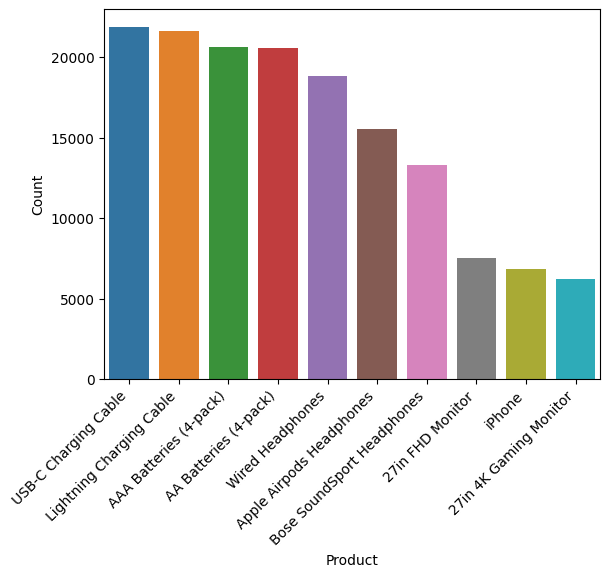

In [37]:
sns.barplot(x='Product',y='Count',data=top10_products.head(10))
plt.xticks(rotation=45,ha='right')
plt.show()

In [38]:
buttom10_products=df1.groupby('Product').size().reset_index(name='Count')
buttom10_products=buttom10_products.sort_values('Count',ascending=False)
buttom10_products.tail(10)

,Product,Count
1,27in 4K Gaming Monitor,6225
3,34in Ultrawide Monitor,6174
9,Google Phone,5522
8,Flatscreen TV,4794
13,Macbook Pro Laptop,4721
14,ThinkPad Laptop,4126
0,20in Monitor,4098
16,Vareebadd Phone,2065
11,LG Washing Machine,666
10,LG Dryer,646


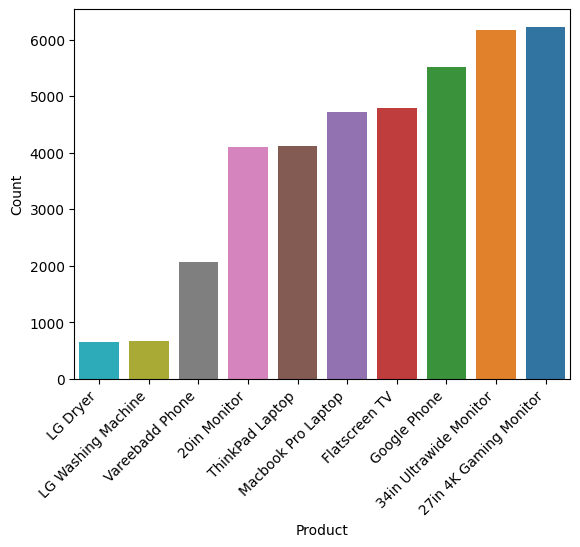

In [39]:
sns.barplot(x='Product',y='Count',data=buttom10_products.tail(10))
plt.xticks(rotation=45,ha='right')
plt.gca().invert_xaxis() 
plt.show()

<Axes: xlabel='Quantity Ordered', ylabel='Count'>

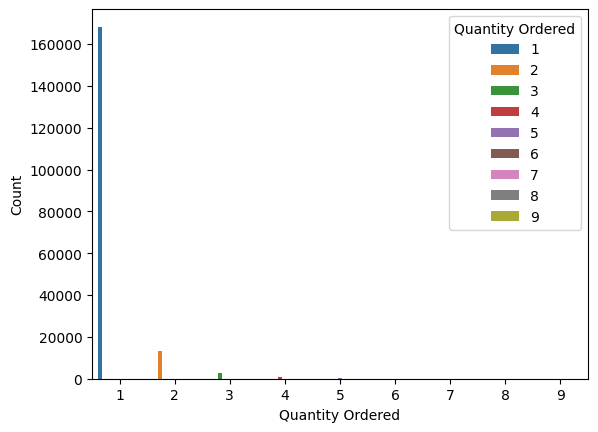

In [40]:
sns.barplot(x='Quantity Ordered',y='Count',data=Order_quality, hue='Quantity Ordered')

Text(0.5, 1.0, 'probability density function of quantity ordered')

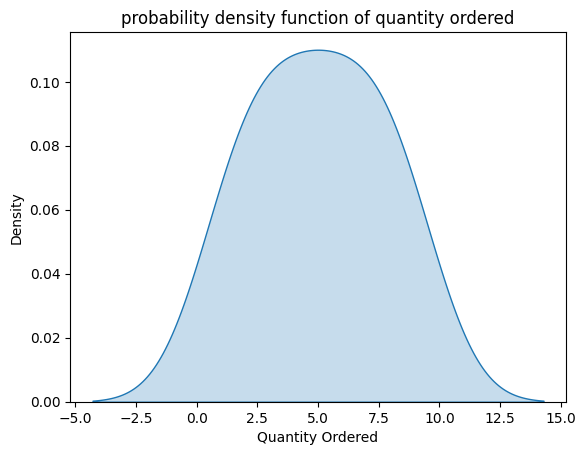

In [41]:
sns.kdeplot(x='Quantity Ordered',data=Order_quality,fill=True)
plt.title('probability density function of quantity ordered')


<Axes: xlabel='Month'>

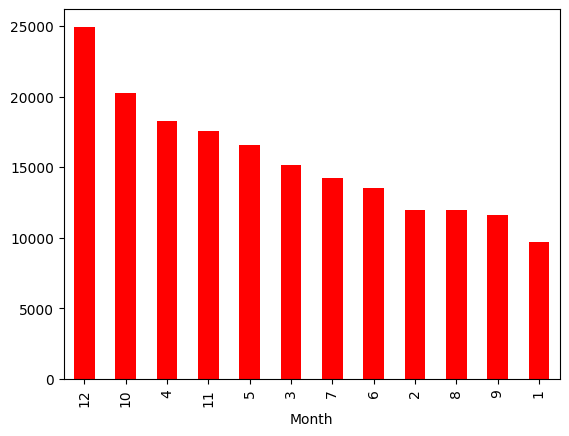

In [42]:
month_sales.plot(kind='bar',x='Month',y='Count',color='red',legend=None)


<Axes: xlabel='Price Each'>

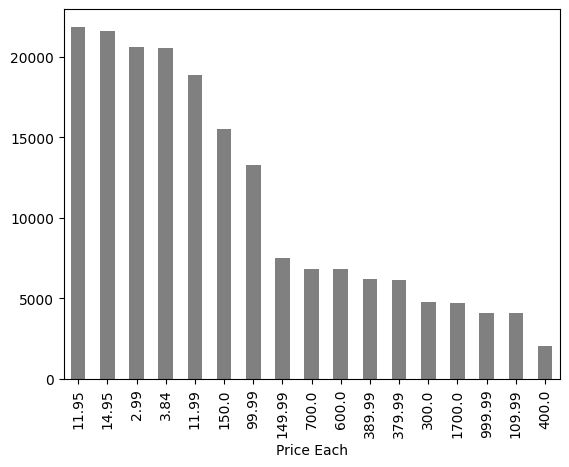

In [43]:
price_each.plot(kind='bar',x='Price Each',y='Count',color='grey',legend=None)


<Axes: xlabel='Hour', ylabel='Count'>

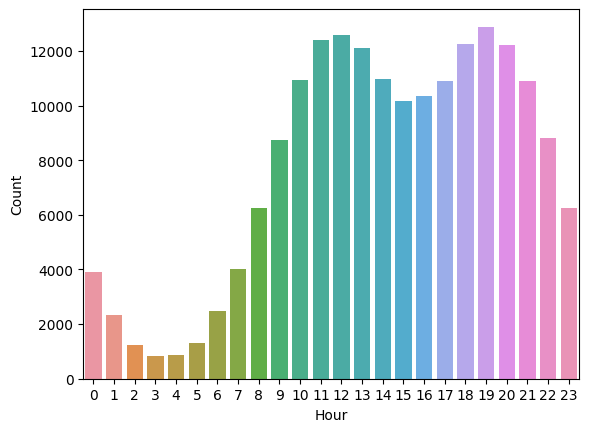

In [44]:
sns.barplot(x='Hour',y='Count',data=hourlysale_count)

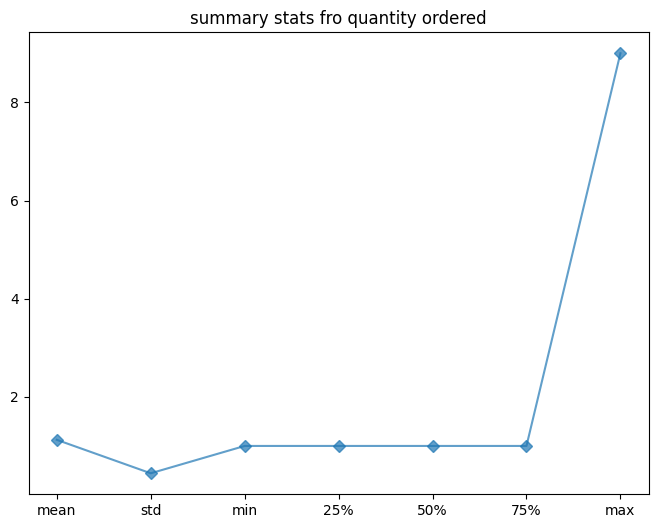

In [45]:
plt.figure(figsize=(8,6))
df1['Quantity Ordered'].describe()[1:].plot(alpha=0.7,marker='D', markersize=6)
plt.title('summary stats fro quantity ordered')
plt.show()

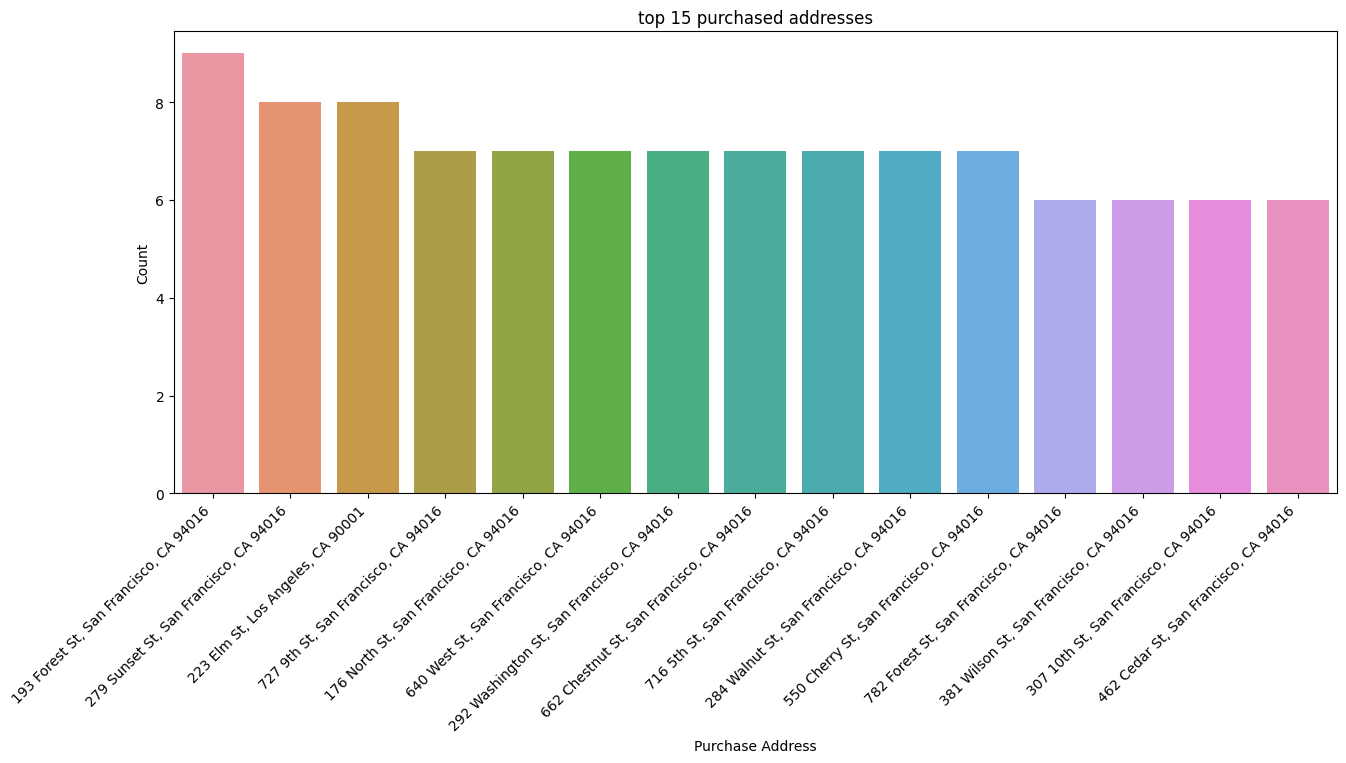

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(x='Purchase Address',y='Count',data=top15_addr.head(15))
plt.xlabel('Purchase Address')
plt.ylabel('Count')
plt.title('top 15 purchased addresses')
plt.xticks(rotation=45, ha='right')
plt.show()

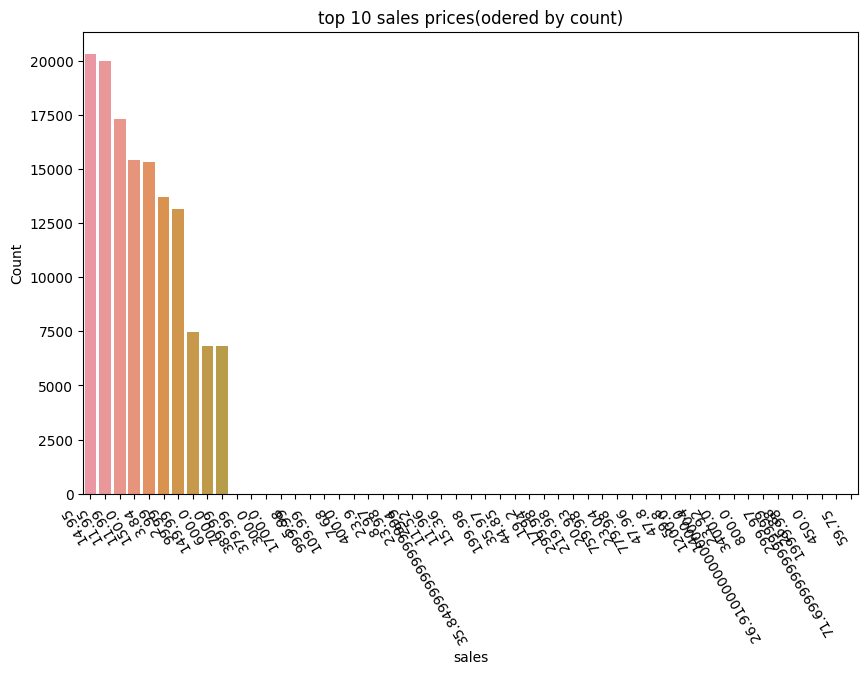

In [107]:
order=top10salesprice.sort_values(by='Count',ascending=False)['Sales'].unique()
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales',y='Count',data=top10salesprice.head(10), order=order)
plt.xlabel('sales')
plt.ylabel('Count')
plt.title('top 10 sales prices(odered by count)')
plt.xticks(rotation=120, ha='right')
plt.show()

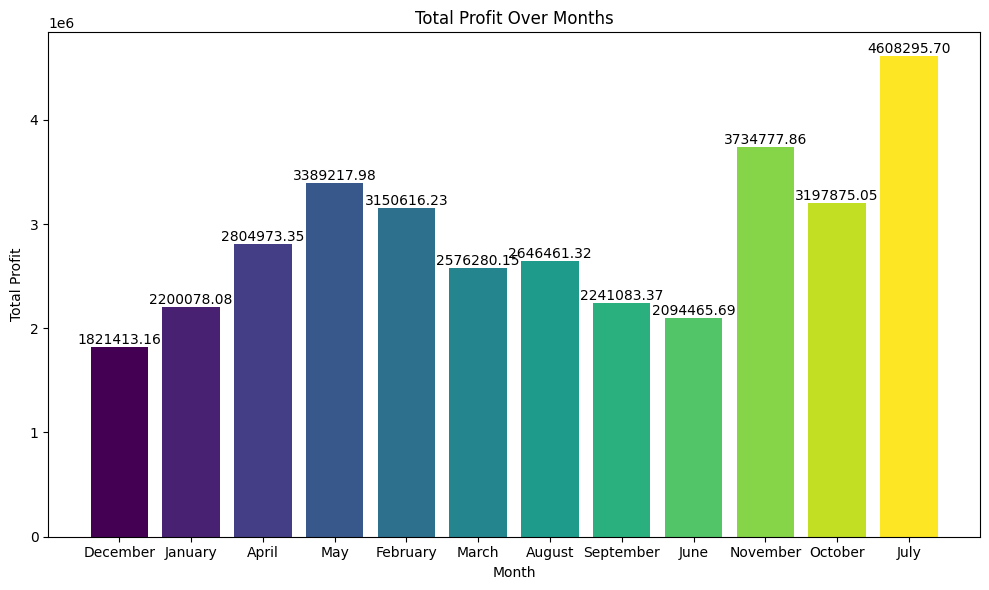

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

months = df1['Month'].unique()
total_profit = df1.groupby('Month')['Sales'].sum()  

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(months)))

for i, (month, profit) in enumerate(zip(months, total_profit)):
    month_name = calendar.month_name[month]  
    plt.bar(month_name, profit, color=colors[i])

    plt.text(month_name, profit, f'{profit:.2f}', ha='center', va='bottom')  

plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Total Profit Over Months')

plt.tight_layout()
plt.show()


In [50]:
total_sales=df1['Sales'].sum()
total_sales

34465537.93999999

In [51]:
marginal_profit=0.20

In [52]:
EstimatedTotalProfit=total_sales*marginal_profit
EstimatedTotalProfit

6893107.587999999